<a href="https://colab.research.google.com/github/siddhartha1506/sentimental-analysis-of-tweets/blob/main/Sentimental_analysis_of_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

**Tweets**

In [ ]:
path='/content/sample_data/tweets.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username
0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran
1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet
2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett
3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr
4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella


In [ ]:
print(df.Text.values[3], "\n\n\n")
print(df.Text.values[38])

@dell your customer service is horrible especially agent syedfaisal who has made this experience of purchasing a new computer downright awful and I’ll reconsider ever buying a Dell in the future @DellTech 



@Dell @MichaelDell  u r known for the best in class laptop and hardware and even services. We are sure you will not disappoint. https://t.co/G7ECpgckwF


**Example: **
                1st line - Negative sentiment
                2nd line - Positive sentiment

**User with maximum tweets**

In [ ]:
max_no_of_tweets = df["Username"].value_counts()[:10]
max_no_of_tweets

johnphillips34     334
jkline120          174
JordanJamesEtem    117
mrlarryridley      111
AiThority          104
solucionetcp        99
jonathanj92389      94
AnsgarTOdinson      79
mikecodemonkey      75
Bradley72901397     56
Name: Username, dtype: int64

**Sentiment Analysis**

**Setting up the model**

In [ ]:
sia_model= SentimentIntensityAnalyzer()
sia_model

In [ ]:
example = df.Text.values[105]
example

'@jaserhunter @Dell @Dell does make some nice gaming rigs and huge wide screen monitors that would be amazing for editing photos, and gaming obvs.'

In [ ]:
sia_model.polarity_scores(example)

{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.836}

The model correctly predicts the appropriate sentiment.
Applying for the entire dataset. 

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Tweet Id']
    res[myid] = sia_model.polarity_scores(text)
Vader_res = pd.DataFrame(res).T
Vader_res

  0%|          | 0/24970 [00:00<?, ?it/s]

,neg,neu,pos,compound
1575991191170342912,0.000,0.875,0.125,0.6461
1575965354425131008,0.000,1.000,0.000,0.0000
1575958171423752203,0.000,0.899,0.101,0.5719
1575939891485032450,0.188,0.812,0.000,-0.7579
1575939359160750080,0.000,1.000,0.000,0.0000
...,...,...,...,...
1477097760931336198,0.087,0.764,0.149,0.5414
1477096631300415496,0.000,0.644,0.356,0.9055
1477091355629432833,0.000,1.000,0.000,0.0000
1477090070830141442,0.000,0.926,0.074,0.2846


In [ ]:
Vader_res = Vader_res.reset_index().rename(columns = {'index' : 'Tweet Id'})

In [ ]:
# Join vader_res to the original DataFrame
Vader_res = df.merge(Vader_res, how = "left")
Vader_res.head()

,Datetime,Tweet Id,Text,Username,neg,neu,pos,compound
0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,0.000,0.875,0.125,0.6461
1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,0.000,1.000,0.000,0.0000
2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,0.000,0.899,0.101,0.5719
3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,0.188,0.812,0.000,-0.7579
4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,0.000,1.000,0.000,0.0000


**To add the column of sentiment at the end**

In [ ]:
def Sentiment_label(value):
    if value > 0:
        return "Positive"
    if value == 0:
        return "Neutral"
    if value < 0:
        return "Negative"
    
Vader_res["Sentiment"] = Vader_res['compound'].map(Sentiment_label)

The sentiment is based on the compund value:             
Greater than 0 - Positve                     
Less than 0 - Negative                             
Equal to 0 - Neutral

In [ ]:
Vader_res.head()

,Datetime,Tweet Id,Text,Username,neg,neu,pos,compound,Sentiment
0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,0.000,0.875,0.125,0.6461,Positive
1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,0.000,1.000,0.000,0.0000,Neutral
2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,0.000,0.899,0.101,0.5719,Positive
3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,0.188,0.812,0.000,-0.7579,Negative
4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,0.000,1.000,0.000,0.0000,Neutral


**Visulize the Sentiments**

Text(0, 0.5, 'Number of tweets')

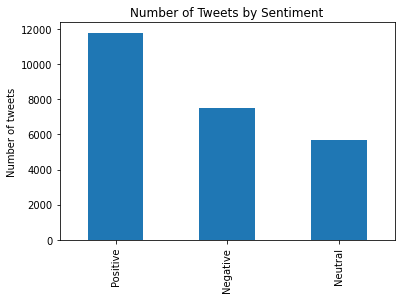

In [ ]:
ax = Vader_res.Sentiment.value_counts().plot(kind = 'bar', label = 'ax')
ax.set_title ("Number of Tweets by Sentiment")
ax.set_ylabel ("Number of tweets")

**Created subset of positive,negative,neutral words in tweets**

In [ ]:
Positive_tweets = Vader_res[Vader_res['Sentiment'] == 'Positive']
Neutral_tweets = Vader_res[Vader_res['Sentiment'] == 'Neutral']
Negative_tweets = Vader_res[Vader_res['Sentiment'] == 'Negative']

In [ ]:
combined_pos_text =  ''.join(Positive_tweets.Text)
print("There are {} words in the combination of all positive tweets.\n".format(len(combined_pos_text)))

combined_neg_text =  ''.join(Negative_tweets.Text)
print("There are {} words in the combination of all negative tweets.\n" .format(len(combined_neg_text)))

combined_neu_text =  ''.join(Neutral_tweets.Text)
print("There are {} words in the combination of all neutral tweets.\n" .format(len(combined_neu_text)))

There are 2173661 words in the combination of all positive tweets.

There are 1448753 words in the combination of all negative tweets.

There are 698244 words in the combination of all neutral tweets.

